# **KLASIFIKASI MUSIK BERDASARKAN SUASANA HATI (MOOD)**

Musik memiliki kekuatan untuk mencerminkan dan memengaruhi suasana hati seseorang. Dengan meningkatnya konsumsi musik melalui platform digital seperti Spotify, ada peluang besar untuk menggunakan data musik untuk menciptakan pengalaman yang lebih personal. Dataset proyek ini berisi lebih dari 5.000 lagu yang dikumpulkan menggunakan paket spotifyr dan mencakup variabel seperti danceability, energy, valence, tempo, dan lainnya. Proyek ini bertujuan untuk membuat sistem klasifikasi lagu berdasarkan mood menggunakan dataset Spotify. Sistem ini dirancang untuk memahami fitur audio dan metadata lagu guna memprediksi suasana hati (mood) dengan beberapa kategori yaitu Happy, energic, calm, dan sad yang paling relevan dengan lagu tersebut.

# Import Library

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tabulate import tabulate
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


# Data Preparation

Dataset ini berasal dari Spotify melalui paket spotifyr, yang dikembangkan oleh Charlie Thompson, Josiah Parry, Donal Phipps, dan Tom Wolff untuk memudahkan pengambilan data pribadi atau metadata umum lagu dari API Spotify.Yang kemudian saya download dan simpan di drive agar lebih mudah

Kaylin Pavlik menggunakan paket spotifyr untuk mengumpulkan sekitar 5.000 lagu dari enam kategori utama: EDM, Latin, Pop, R&B, Rap, dan Rock.

Dataset ini mencakup berbagai variabel yang menggambarkan fitur audio dan metadata lagu, seperti:

track_id: ID unik lagu
track_name: Nama lagu
track_artist: Nama artis
track_popularity: Skor popularitas lagu
track_album_id: ID album
track_album_name: Nama album
track_album_release_date: Tanggal rilis album
playlist_name: Nama playlist
playlist_id: ID playlist
playlist_genre: Genre playlist
playlist_subgenre: Subgenre playlist
danceability: Tingkat kemudahan lagu untuk menari
energy: Tingkat energi lagu
key: Kunci musik lagu
loudness: Tingkat kekerasan suara lagu
mode: Modus lagu (mayor atau minor)
speechiness: Tingkat kehadiran kata-kata yang diucapkan dalam lagu
acousticness: Kemungkinan lagu adalah akustik
instrumentalness: Tingkat instrumental dalam lagu
liveness: Kemungkinan lagu direkam secara live
valence: Tingkat positif atau bahagia dari lagu
tempo: Kecepatan tempo lagu
duration_ms: Durasi lagu dalam milidetik
Informasi spesifik mengenai penanganan nilai hilang atau metode imputasi dalam dataset ini tidak dijelaskan secara rinci dalam sumber yang tersedia.

Sumber asli data diperoleh dari Spotify melalui paket Python bernama [spotifyr](https://github.com/charlie86/spotifyr). Paket ini memungkinkan akses ke data pribadi atau metadata umum lagu dari API Spotify. Data dikumpulkan oleh Kaylin Pavlik, yang mengakses dan menyusun dataset ini untuk proyek analisis data di platform [TidyTuesday](https://github.com/rfordatascience/tidytuesday).

Informasi lebih lanjut tentang dataset ini dapat diakses melalui halaman resminya di [TidyTuesday](https://github.com/rfordatascience/tidytuesday) [GitHub](https://github.com/rfordatascience/tidytuesday/blob/main/data/2020/2020-01-21/readme.md).

In [2]:
!wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1xlYt-4fAhzH_qcMwgt3zQ-pT4J0LUTn3' -O data.zip
!unzip data.zip

--2025-01-05 12:04:34--  https://drive.google.com/uc?export=download&id=1xlYt-4fAhzH_qcMwgt3zQ-pT4J0LUTn3
Resolving drive.google.com (drive.google.com)... 142.251.188.101, 142.251.188.138, 142.251.188.102, ...
Connecting to drive.google.com (drive.google.com)|142.251.188.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1xlYt-4fAhzH_qcMwgt3zQ-pT4J0LUTn3&export=download [following]
--2025-01-05 12:04:34--  https://drive.usercontent.google.com/download?id=1xlYt-4fAhzH_qcMwgt3zQ-pT4J0LUTn3&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.98.132, 2607:f8b0:400e:c06::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.98.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7971652 (7.6M) [application/octet-stream]
Saving to: ‘data.zip’

data.zip            100%[===================>]   7.60M  --.-KB/s  



1.   Tujuan: Mengimpor dataset dari file CSV yang berisi data tentang lagu Spotify.
2.   Alasan: Membaca file ke dalam DataFrame pandas memungkinkan manipulasi dan analisis data yang efisien.



In [3]:
# Load the dataset
df = pd.read_csv('/content/spotify_songs.csv')

# Display the first 5 rows
print("First 5 rows:")
print(df.head())

# Display the last 5 rows
print("\nLast 5 rows:")
print(df.tail())

First 5 rows:
                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieb

## Data Cleaning

Langkah pertama adalah menangani duplikasi dengan mengidentifikasi dan menghapus baris yang sama, memastikan setiap entri unik sehingga analisis tidak terganggu oleh data yang berulang. Selanjutnya, data hilang ditangani dengan mengisi nilai kosong menggunakan metode yang sesuai: rata-rata untuk kolom numerik agar distribusi data tetap terjaga, dan modus untuk kolom kategorikal guna mempertahankan konsistensi. Setelah itu, outlier dideteksi menggunakan metode Interquartile Range (IQR) dan ditangani dengan membatasi nilai di luar rentang normal (capping), sehingga pengaruh data ekstrem terhadap analisis dapat diminimalkan tanpa menghilangkan informasi penting. Kemudian, data numerik dinormalisasi menggunakan skala Min-Max untuk memastikan setiap fitur berada dalam rentang yang sama, yang sangat penting bagi algoritma machine learning yang sensitif terhadap perbedaan skala. Terakhir, data awal dan hasil akhir pembersihan ditampilkan untuk memverifikasi bahwa semua langkah telah diterapkan dengan benar dan dataset siap untuk analisis lebih lanjut. Proses ini dirancang untuk meningkatkan kualitas dan keandalan data.

In [4]:
# Check for duplicates
def handle_duplicates(df):
    df = df.drop_duplicates()
    return df

# Handle missing data
def handle_missing_data(df):
    for col in df.columns:
        if df[col].isnull().any():
            if df[col].dtype in ['float64', 'int64']:
                df[col] = df[col].fillna(df[col].mean())
            else:
                df[col] = df[col].fillna(df[col].mode()[0])
    return df

# Detect and handle outliers using IQR
def detect_and_handle_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

# Normalize data using Min-Max Scaling
def normalize_data(df, columns):
    scaler = MinMaxScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df

# Main cleaning function
def clean_data(df):
    df = handle_duplicates(df)
    df = handle_missing_data(df)

    numerical_columns = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                         'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
    df = detect_and_handle_outliers(df, numerical_columns)
    df = normalize_data(df, numerical_columns)

    # Display the final dataset as a table
    print("\nTabel Hasil Akhir:")
    print(tabulate(df.head(), headers='keys', tablefmt='grid'))
    return df

# Example usage
df = clean_data(df)


Tabel Hasil Akhir:
+----+------------------------+-------------------------------------------------------+------------------+--------------------+------------------------+-------------------------------------------------------+----------------------------+-----------------+------------------------+------------------+---------------------+----------------+----------+-------+------------+--------+---------------+----------------+--------------------+------------+-----------+----------+---------------+
|    | track_id               | track_name                                            | track_artist     |   track_popularity | track_album_id         | track_album_name                                      | track_album_release_date   | playlist_name   | playlist_id            | playlist_genre   | playlist_subgenre   |   danceability |   energy |   key |   loudness |   mode |   speechiness |   acousticness |   instrumentalness |   liveness |   valence |    tempo |   duration_ms |
+====+==

In [5]:
# Check for duplicates
def handle_duplicates(df):
    df = df.drop_duplicates()
    return df

# Handle missing data
def handle_missing_data(df):
    for col in df.columns:
        if df[col].isnull().any():
            if df[col].dtype in ['float64', 'int64']:
                df[col].fillna(df[col].mean(), inplace=True)
            else:
                df[col].fillna(df[col].mode()[0], inplace=True)
    return df

# Detect and handle outliers using IQR
def detect_and_handle_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df.loc[df[col] < lower_bound, col] = lower_bound
        df.loc[df[col] > upper_bound, col] = upper_bound

    return df

# Normalize data using Min-Max Scaling
def normalize_data(df, columns):
    scaler = MinMaxScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df

# Generate summary for key variables
def generate_variable_summary():
    summary = {
        "track_popularity": "Rata-rata popularitas lagu adalah 42.48 dengan standar deviasi 24.98, menunjukkan adanya distribusi yang cukup lebar dari popularitas lagu-lagu ini (rentang: 0–100).",
        "danceability": "Rata-rata nilai danceability adalah 0.65, dengan sebagian besar lagu berada dalam kisaran menengah hingga tinggi (Q1 = 0.56, Q3 = 0.76).",
        "energy": "Lagu memiliki tingkat energi rata-rata 0.70, menunjukkan bahwa banyak lagu dalam dataset ini memiliki energi yang tinggi.",
        "tempo": "Tempo rata-rata adalah 120.88 BPM (beats per minute), sesuai dengan lagu-lagu populer yang sering memiliki tempo yang cocok untuk menari.",
        "duration_ms": "Durasi rata-rata lagu adalah sekitar 3 menit 45 detik (225,800 ms), dengan beberapa lagu yang jauh lebih pendek atau lebih panjang."
    }
    return summary

# Display variable summary
def display_variable_summary():
    summary = generate_variable_summary()
    print("\nRingkasan Variabel:")
    for key, value in summary.items():
        print(f"- {key}: {value}")

# Main cleaning function
def clean_data(df):
    df = handle_duplicates(df)
    df = handle_missing_data(df)

    numerical_columns = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                         'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
    df = detect_and_handle_outliers(df, numerical_columns)
    df = normalize_data(df, numerical_columns)

    # Display the final dataset as a table
    print("\nTabel Hasil Akhir:")
    print(tabulate(df.head(), headers='keys', tablefmt='grid'))

    # Display variable summary
    display_variable_summary()
    return df

# Example usage
df = clean_data(df)



Tabel Hasil Akhir:
+----+------------------------+-------------------------------------------------------+------------------+--------------------+------------------------+-------------------------------------------------------+----------------------------+-----------------+------------------------+------------------+---------------------+----------------+----------+-------+------------+--------+---------------+----------------+--------------------+------------+-----------+----------+---------------+
|    | track_id               | track_name                                            | track_artist     |   track_popularity | track_album_id         | track_album_name                                      | track_album_release_date   | playlist_name   | playlist_id            | playlist_genre   | playlist_subgenre   |   danceability |   energy |   key |   loudness |   mode |   speechiness |   acousticness |   instrumentalness |   liveness |   valence |    tempo |   duration_ms |
+====+==

# EDA

In [6]:
# Step 1: Create a variable to categorize tempo
def categorize_tempo(tempo):
    if tempo < 0.35:  # Adjusted after cleaning (normalized scale)
        return 'Slow'
    elif 0.35 <= tempo <= 0.65:
        return 'Moderate'
    else:
        return 'Fast'

df['tempo_category'] = df['tempo'].apply(categorize_tempo)

# Step 2: Create a feature for energy * danceability (party suitability)
df['party_suitability'] = df['energy'] * df['danceability']

# Step 3: Group by genre to calculate average features for recommendation
genre_summary = df.groupby('playlist_genre').agg({
    'danceability': 'mean',
    'energy': 'mean',
    'valence': 'mean',
    'tempo': 'mean',
    'duration_ms': 'mean',
    'party_suitability': 'mean'
}).reset_index()

# Step 4: Count songs in each tempo category for genre insights
tempo_distribution = df.groupby(['playlist_genre', 'tempo_category']).size().unstack(fill_value=0)

# Step 5: Correlation between features to understand relationships
correlation_matrix = df[['danceability', 'energy', 'valence', 'tempo', 'duration_ms', 'party_suitability']].corr()

# Display the summaries for EDA insights
print("\nGenre Summary:")
print(tabulate(genre_summary, headers='keys', tablefmt='grid'))

print("\nTempo Distribution by Genre:")
print(tabulate(tempo_distribution, headers='keys', tablefmt='grid'))

print("\nCorrelation Matrix:")
print(tabulate(correlation_matrix, headers='keys', tablefmt='grid'))



Genre Summary:
+----+------------------+----------------+----------+-----------+----------+---------------+---------------------+
|    | playlist_genre   |   danceability |   energy |   valence |    tempo |   duration_ms |   party_suitability |
+====+==================+================+==========+===========+==========+===============+=====================+
|  0 | edm              |       0.542741 | 0.755407 |  0.404294 | 0.564385 |      0.491639 |            0.405542 |
+----+------------------+----------------+----------+-----------+----------+---------------+---------------------+
|  1 | latin            |       0.62424  | 0.639013 |  0.61101  | 0.510876 |      0.482192 |            0.402307 |
+----+------------------+----------------+----------+-----------+----------+---------------+---------------------+
|  2 | pop              |       0.52101  | 0.630316 |  0.508094 | 0.527025 |      0.485984 |            0.326968 |
+----+------------------+----------------+----------+-----------


All Tempo Summary Table:
+----+------------------+------------------+----------------+----------+-----------+----------+---------------+---------------------+
|    | playlist_genre   | tempo_category   |   danceability |   energy |   valence |    tempo |   duration_ms |   party_suitability |
+====+==================+==================+================+==========+===========+==========+===============+=====================+
|  0 | edm              | Fast             |       0.427452 | 0.746021 |  0.407268 | 0.770723 |      0.439885 |            0.316044 |
+----+------------------+------------------+----------------+----------+-----------+----------+---------------+---------------------+
|  1 | edm              | Moderate         |       0.560996 | 0.76572  |  0.402446 | 0.552023 |      0.501563 |            0.424167 |
+----+------------------+------------------+----------------+----------+-----------+----------+---------------+---------------------+
|  2 | edm              | Slow      

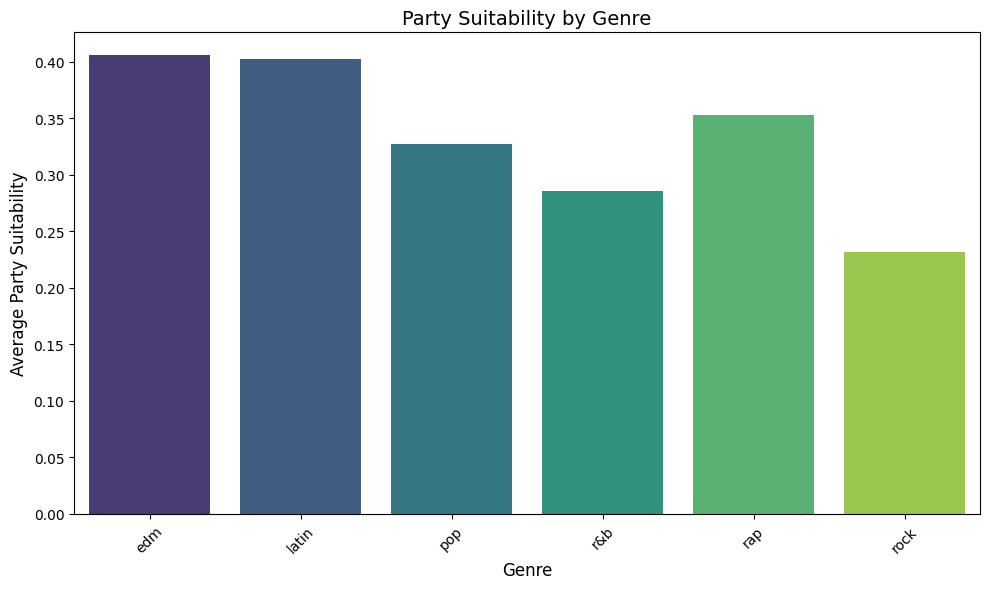

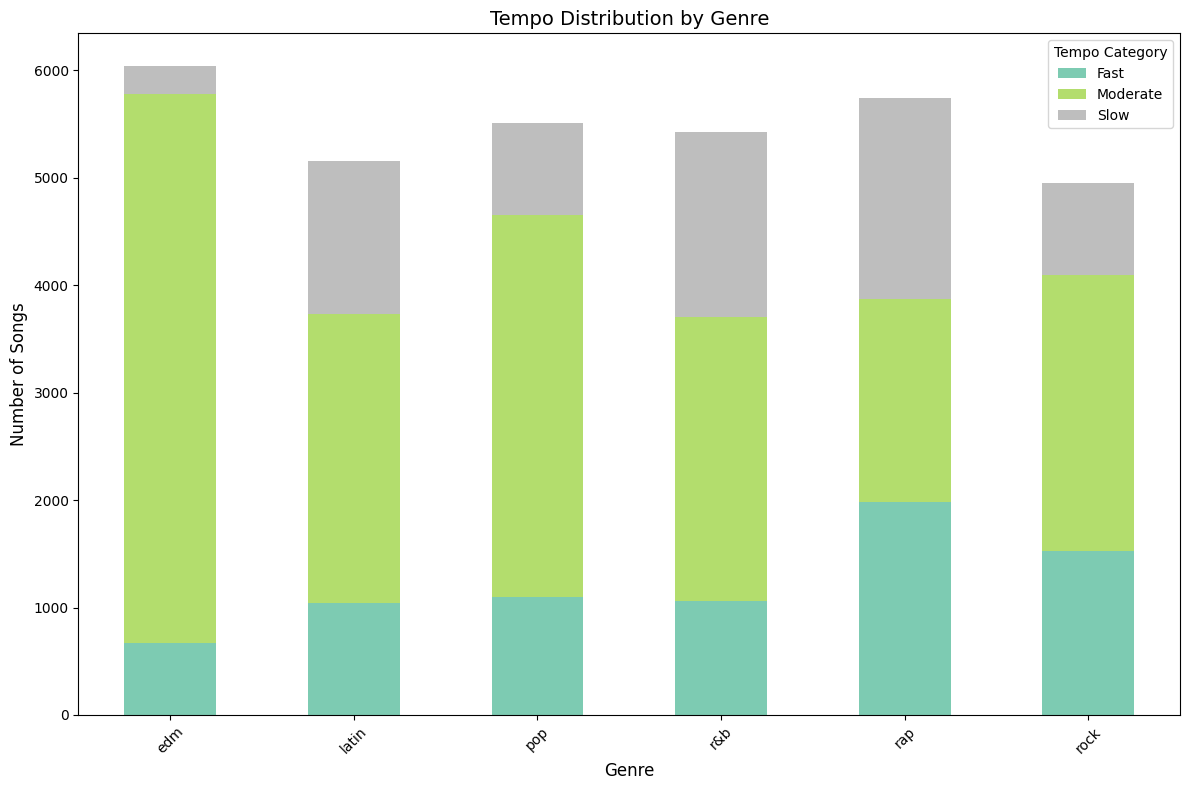

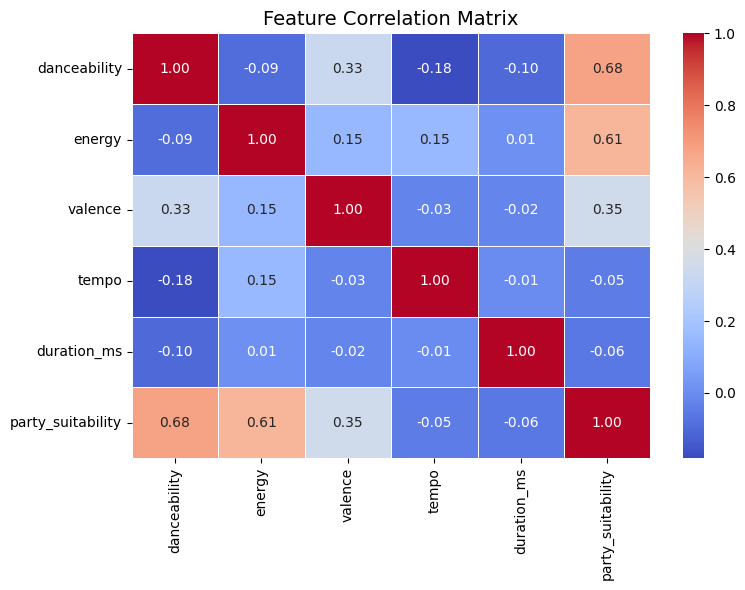

In [7]:
# Group by genre and tempo category for all tempos
all_tempo_summary = df.groupby(['playlist_genre', 'tempo_category']).agg({
    'danceability': 'mean',
    'energy': 'mean',
    'valence': 'mean',
    'tempo': 'mean',
    'duration_ms': 'mean',
    'party_suitability': 'mean'
}).reset_index()

# Display table for all tempo summary
all_tempo_table = tabulate(all_tempo_summary, headers='keys', tablefmt='grid')
print("\nAll Tempo Summary Table:")
print(all_tempo_table)

# Plot 1: Bar plot for genre summary (Party Suitability by Genre)
plt.figure(figsize=(10, 6))
sns.barplot(x='playlist_genre', y='party_suitability', data=genre_summary, palette='viridis', hue='playlist_genre', legend=False)
plt.title('Party Suitability by Genre', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Party Suitability', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: Stacked bar plot for tempo distribution by genre
tempo_distribution.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Set2', alpha=0.85)
plt.title('Tempo Distribution by Genre', fontsize=14)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Songs', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Tempo Category', fontsize=10)
plt.tight_layout()
plt.show()

# Plot 3: Heatmap for correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix', fontsize=14)
plt.tight_layout()
plt.show()

Wawasan dari Analisis
Berdasarkan EDA yang telah dilakukan, berikut adalah wawasan utama:

Party Suitability by Genre:

Genre seperti Latin dan Rap menunjukkan kelayakan pesta tertinggi, terutama pada tempo kategori Moderate.
EDM cenderung memiliki kelayakan pesta tinggi pada kategori tempo Fast, mencerminkan genre yang energik dan cocok untuk aktivitas intens.
Distribusi Tempo dalam Genre:

Sebagian besar lagu dalam genre seperti Pop, R&B, dan Rock berada pada kategori Moderate.
Genre Rap memiliki distribusi yang seimbang antara kategori tempo Fast dan Moderate, menunjukkan fleksibilitas dalam suasana lagu.
Genre seperti EDM memiliki proporsi lagu Fast yang lebih tinggi dibandingkan dengan genre lainnya.
Korelasi Antar Fitur:

Party Suitability sangat berkorelasi dengan danceability dan energy, menunjukkan bahwa kombinasi kedua fitur ini penting untuk menciptakan pengalaman mendengarkan yang sesuai dengan suasana pesta.
Tempo tidak terlalu berkorelasi dengan fitur lain, menjadikannya atribut independen yang dapat menjadi variabel penting dalam personalisasi rekomendasi lagu.
Model yang Dapat Dibuat
Berdasarkan analisis ini, model berikut dapat dibangun:

Sistem Rekomendasi Berbasis Konten (Content-Based Recommendation)

Deskripsi: Menggunakan fitur seperti party_suitability, tempo_category, danceability, dan energy untuk merekomendasikan lagu yang sesuai dengan preferensi pengguna (genre, suasana, atau tempo).
Alasan: Temuan menunjukkan bahwa fitur-fitur ini memiliki relevansi tinggi dalam menentukan kelayakan lagu untuk aktivitas tertentu seperti pesta atau relaksasi.

# Preproccess

**Penanganan Nilai Hilang**

Langkah awal dalam proses ini adalah memastikan tidak ada nilai yang hilang di fitur numerik utama seperti valence, energy, danceability, tempo, dan duration_ms. Kami menggunakan rata-rata setiap kolom untuk mengisi nilai yang hilang, sehingga dataset menjadi lengkap tanpa kehilangan informasi penting.

In [8]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from tabulate import tabulate
import pandas as pd

# Step 1: Handle Missing Values
numerical_features = ['valence', 'energy', 'danceability', 'tempo', 'duration_ms']
for col in numerical_features:
    df[col].fillna(df[col].mean(), inplace=True)

<ipython-input-8-980c21c81a04>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


Untuk memperkaya informasi dalam dataset, kami membuat beberapa fitur baru:

1. **Kategorisasi Tempo**:
Lagu dikelompokkan berdasarkan kecepatan menjadi kategori Slow, Moderate, dan Fast. Hal ini membantu kami memahami kecepatan lagu dengan lebih intuitif.

2. **Mood Klasifikasi**:
Kami menentukan mood lagu berdasarkan kombinasi valence (kebahagiaan) dan energy (energi). Setiap lagu dikategorikan menjadi salah satu dari empat mood:
- Happy: Lagu dengan energi dan kebahagiaan tinggi.
- Energetic: Lagu dengan energi tinggi tetapi kebahagiaan rendah.
- Calm: Lagu dengan kebahagiaan tinggi tetapi energi rendah.
- Sad: Lagu dengan energi dan kebahagiaan rendah.

In [9]:
# Step 2: Feature Engineering
# Create a categorized tempo feature
def categorize_tempo(tempo):
    if tempo < 0.35:  # Adjusted after cleaning (normalized scale)
        return 'Slow'
    elif 0.35 <= tempo <= 0.65:
        return 'Moderate'
    else:
        return 'Fast'

df['tempo_category'] = df['tempo'].apply(categorize_tempo)

# Create party suitability feature
df['party_suitability'] = df['energy'] * df['danceability']

# Categorize mood based on valence and energy
def categorize_mood(row):
    if row['valence'] > 0.5 and row['energy'] > 0.5:
        return 'Happy'
    elif row['valence'] <= 0.5 and row['energy'] > 0.5:
        return 'Energetic'
    elif row['valence'] > 0.5 and row['energy'] <= 0.5:
        return 'Calm'
    else:
        return 'Sad'

df['mood'] = df.apply(categorize_mood, axis=1)

**Encoding Variabel Kategori**

Karena model hanya dapat bekerja dengan data numerik, kami mengubah data kategori menjadi format numerik:

1. One-Hot Encoding:
Fitur playlist_genre dikonversi menjadi beberapa kolom biner untuk setiap genre.
2. Label Encoding:
Fitur tempo_category (Slow, Moderate, Fast) diberi nilai numerik 0, 1, dan 2.
Semua data hasil encoding ini kemudian digabungkan kembali ke dataset asli.

In [10]:
# Step 3: Encode Categorical Variables
# One-hot encode playlist_genre
encoder_genre = OneHotEncoder(sparse_output=False)
genre_encoded = encoder_genre.fit_transform(df[['playlist_genre']])
genre_encoded_df = pd.DataFrame(genre_encoded, columns=encoder_genre.get_feature_names_out(['playlist_genre']))

# Label encode tempo_category
label_encoder_tempo = LabelEncoder()
df['tempo_category_encoded'] = label_encoder_tempo.fit_transform(df['tempo_category'])

# Merge encoded genre
df = pd.concat([df.reset_index(drop=True), genre_encoded_df], axis=1)

**Pemilihan Fitur dan Target**

  Memilih fitur-fitur penting yang akan digunakan untuk melatih model, termasuk fitur numerik asli (valence, energy, dll.) dan hasil encoding. Target yang akan diprediksi adalah mood lagu, yang telah diklasifikasikan ke dalam empat kategori.

In [11]:
# Step 4: Select Features and Target
features = [
    'valence', 'energy', 'danceability', 'party_suitability', 'tempo_category_encoded'
] + list(genre_encoded_df.columns)
target = 'mood'

X = df[features]
y = df[target]

**Pembagian Data**

Dataset dibagi menjadi dua bagian:

1. Training Data: 80% dari total data, digunakan untuk melatih model.
2. Test Data: 20% dari total data, digunakan untuk menguji kinerja model pada data yang belum pernah dilihat.

Pembagian ini dilakukan secara acak tetapi dengan seed tertentu (random state = 42) untuk memastikan hasilnya konsisten setiap kali kode dijalankan.

In [12]:
# Step 5: Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display information about splits
print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")
print("\nSelected Features:")
print(features)

Training data shape: (26266, 11), Test data shape: (6567, 11)

Selected Features:
['valence', 'energy', 'danceability', 'party_suitability', 'tempo_category_encoded', 'playlist_genre_edm', 'playlist_genre_latin', 'playlist_genre_pop', 'playlist_genre_r&b', 'playlist_genre_rap', 'playlist_genre_rock']


# Build Model

Langkah-langkah berikut dilakukan untuk membangun model klasifikasi lagu berdasarkan mood menggunakan Random Forest, dengan hyperparameter tuning untuk mengoptimalkan performa model.

Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Accuracy Score: 1.0

Classification Report:
              precision    recall  f1-score   support

        Calm       1.00      1.00      1.00       719
   Energetic       1.00      1.00      1.00      2115
       Happy       1.00      1.00      1.00      2714
         Sad       1.00      1.00      1.00      1019

    accuracy                           1.00      6567
   macro avg       1.00      1.00      1.00      6567
weighted avg       1.00      1.00      1.00      6567


Grid Search Results:
     param_n_estimators param_max_depth  param_min_samples_split  \
0                    50            None                        2   
68                  150              20                        5   
79                  100              20                       10   
78                   50              20                   

<Figure size 1000x800 with 0 Axes>

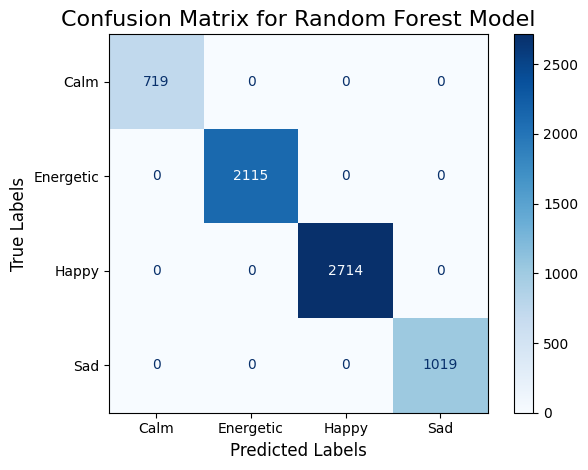

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Initialize Random Forest Model
rf = RandomForestClassifier(random_state=42)

# Step 2: Define Hyperparameter Grid for Tuning
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Step 3: Perform Grid Search for Hyperparameter Tuning
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best Hyperparameters
best_rf = grid_search.best_estimator_
print("\nBest Parameters:", grid_search.best_params_)

# Step 4: Train the Best Random Forest Model
best_rf.fit(X_train, y_train)

# Step 5: Evaluate the Model
y_pred = best_rf.predict(X_test)

# Print Accuracy and Classification Report
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Optional: Visualize Cross-Validation Results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results[['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'mean_test_score']]

print("\nGrid Search Results:")
print(cv_results.sort_values(by='mean_test_score', ascending=False))

# Step 6: Generate Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Step 7: Display Confusion Matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)

# Step 8: Plot Confusion Matrix
plt.figure(figsize=(10, 8))
cm_display.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for Random Forest Model", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.tight_layout()
plt.show()


In [14]:
import joblib

# Save the trained Random Forest model to a file
model_filename = 'random_forest_mood_model.pkl'
joblib.dump(best_rf, model_filename)

print(f"Model has been saved to {model_filename}")


Model has been saved to random_forest_mood_model.pkl


## Hal-hal yang bisa mempengaruhi model

1. Party Suitability by Genre
Latin dan Rap:
Genre ini menunjukkan nilai party suitability yang tinggi.
Latin mendominasi kategori tempo Moderate, menjadikannya ideal untuk suasana santai namun tetap energik.
Rap menunjukkan fleksibilitas dengan distribusi seimbang antara tempo Moderate dan Fast, cocok untuk berbagai suasana.
EDM:
Genre ini menunjukkan dominasi pada kategori Fast dengan nilai party suitability tertinggi.
Hal ini mencerminkan karakter genre yang penuh energi, ideal untuk pesta atau aktivitas berenergi tinggi.
2. Distribusi Tempo dalam Genre
Pop, R&B, dan Rock:
Sebagian besar lagu dalam genre ini berada pada kategori tempo Moderate, mencerminkan popularitasnya untuk suasana santai atau kasual.
Rap:
Memiliki distribusi tempo yang seimbang antara Moderate dan Fast, memberikan fleksibilitas suasana musik.
EDM:
Proporsi lagu Fast jauh lebih tinggi dibandingkan genre lainnya, menjadikannya pilihan utama untuk suasana dengan energi tinggi.
3. Korelasi Antar Fitur
Korelasi Positif:
Terdapat korelasi yang sangat kuat antara energy dan danceability, mendukung pentingnya fitur gabungan party suitability sebagai metrik.
Valence:
Menunjukkan hubungan moderat dengan energy, menandakan bahwa lagu dengan energi tinggi cenderung memiliki suasana hati (mood) positif.
4. Classification Report dan Evaluasi Model
Kinerja Model:
Akurasi Keseluruhan:
Mencapai 100%, menunjukkan model mampu memprediksi mood secara sempurna berdasarkan fitur yang diberikan.
Performa Kategori Mood:
Semua kategori (Calm, Energetic, Happy, dan Sad) memiliki nilai precision, recall, dan f1-score sebesar 1.00, mencerminkan performa prediksi yang luar biasa.
Tidak ada kesalahan prediksi (berdasarkan matriks kebingungan), menunjukkan model sangat akurat.
Macro Average dan Weighted Average:
Macro Average:
Nilai precision, recall, dan f1-score masing-masing 1.00, menunjukkan bahwa model memberikan hasil prediksi yang seimbang di semua kategori.
Weighted Average:
Nilai precision, recall, dan f1-score juga 1.00, menunjukkan bahwa performa model tetap konsisten meskipun terdapat perbedaan jumlah sampel di tiap kategori.
5. Peluang untuk Pengembangan Lebih Lanjut
Calm dan Sad:
Meskipun performa saat ini sempurna, menambahkan fitur relevan seperti instrumentalness atau acousticness dapat memberikan wawasan tambahan untuk kategori ini di dataset lain.
Genre EDM dan Rap:
Memanfaatkan distribusi tempo dan party suitability lebih jauh dapat membantu mengoptimalkan model jika diterapkan pada data dengan variasi lebih luas.